<a href="https://colab.research.google.com/github/PatrickLeloup/DSWP_Aluno/blob/main/Ex_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar Data Frame
from google.colab import drive
drive.mount ('/content/drive')
df_atleta = pd.read_csv('/content/drive/My Drive/dswp/athlete_events.csv')
df_atleta.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df_atleta.shape

(271116, 15)

In [10]:
# Transformar para lower
df_atleta.columns = [col.lower() for col in df_atleta.columns]
df_atleta.head()

#df_iris.columns = [c.replace(' ', '_') for c in df_iris.columns]
#df_iris.columns = [c.replace('_(cm)', '') for c in df_iris.columns]
#df_iris.head()



,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#df_atleta2 = df_atleta['id','name', 'sex', ].groupby(by = ['id', 'name', 'sex'])

In [11]:
#df_atleta2.head()


#df_atleta.set_index('id')
#df_atleta.head()

In [12]:
df_atleta2 = df_atleta[['height', 'weight']]
df_atleta2.head()

,height,weight
0,180.0,80.0
1,170.0,60.0
2,NaN,NaN
3,NaN,NaN
4,185.0,82.0


In [13]:
df_atleta2.isnull().sum()

height    60171
weight    62875
dtype: int64

In [14]:
df_atleta2.dropna(inplace = True )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2df3b061d0>,
      dtype=object)

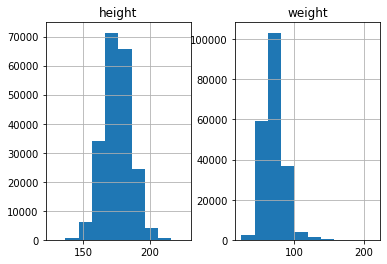

In [15]:
df_atleta2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2df3ad49e8>,
      dtype=object)

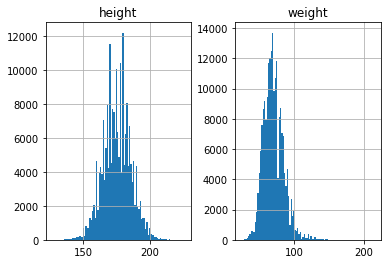

In [16]:
df_atleta2.hist(bins= 100)

In [18]:
def compara_graficos(y, w, lambda_box_cox):
    fig, ax = plt.subplots(1, 2) 
  
    # Gráfico das distribuições originais e transformada
    sns.distplot(y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = "Non-Normal", color ="green", ax = ax[0]) 
    sns.distplot(w, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = "Normal", color ="green", ax = ax[1]) 
  
    # Legendas 
    plt.legend(loc = "upper right") 
  
    # Redimensionando os sub-gráficos 
    fig.set_figheight(5) 
    fig.set_figwidth(10) 
    
    print(f"Valor de Lambda usado na transformação: {lambda_box_cox}") 

In [36]:
from scipy import stats 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 0.9316967340700117


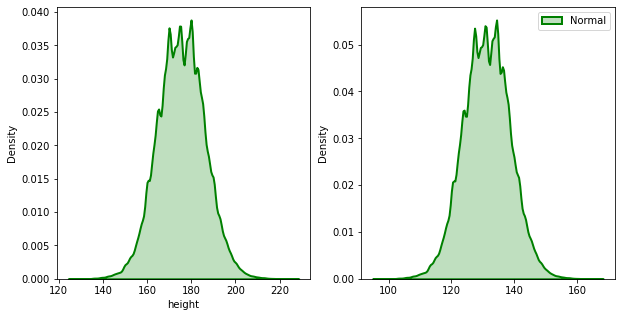

In [21]:
box_cox, lambda_box_cox = stats.boxcox(df_atleta2['height']) 
compara_graficos(df_atleta2['height'], box_cox, lambda_box_cox)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 0.022747537729183122


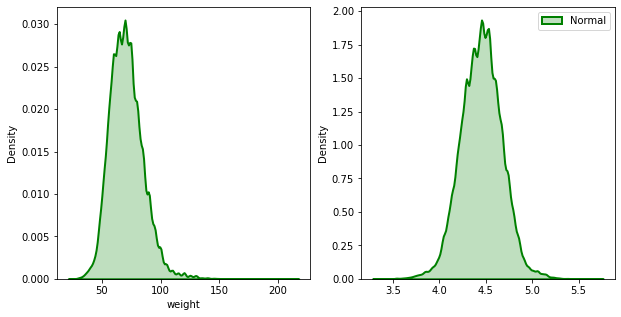

In [22]:
box_cox, lambda_box_cox = stats.boxcox(df_atleta2['weight']) 
compara_graficos(df_atleta2['weight'], box_cox, lambda_box_cox)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 1


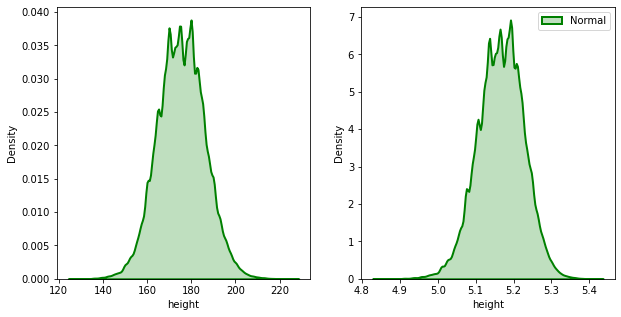

In [31]:
transformacao_log = np.log(df_atleta2['height'])
compara_graficos(df_atleta2['height'], transformacao_log, 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 1


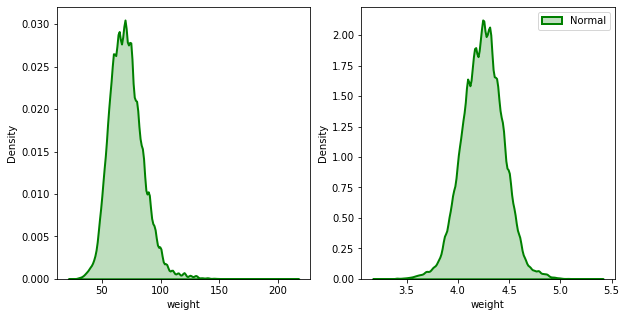

In [32]:
transformacao_log = np.log(df_atleta2['weight'])
compara_graficos(df_atleta2['weight'], transformacao_log, 1)

In [24]:
from sklearn.preprocessing import PowerTransformer

In [26]:
yeo_johnson = PowerTransformer(method = 'yeo-johnson', standardize = True)
atleta2_yeo_johnson = yeo_johnson.fit_transform(df_atleta2)
df_atleta2_yeo_johnson = pd.DataFrame(atleta2_yeo_johnson, columns = ['height', 'weight'])
df_atleta2_yeo_johnson.head()

,height,weight
0,0.441847,0.719468
1,-0.506779,-0.721379
2,0.914797,0.843544
3,0.914797,0.843544
4,0.914797,0.843544


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 1


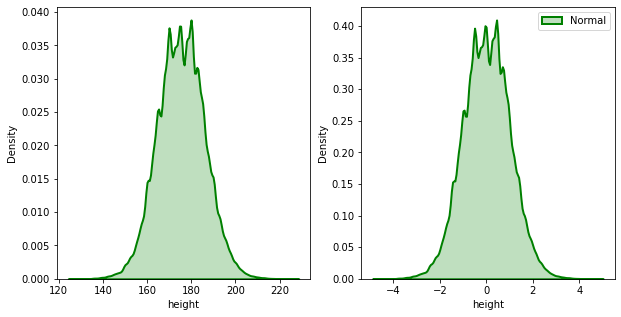

In [34]:
compara_graficos(df_atleta2['height'], df_atleta2_yeo_johnson['height'], 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 1


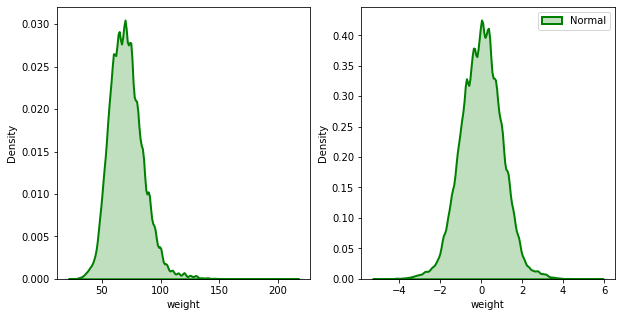

In [35]:
compara_graficos(df_atleta2['weight'], df_atleta2_yeo_johnson['weight'], 1)

(array([8.0000e+00, 1.3000e+01, 2.0000e+01, 4.6000e+01, 1.2500e+02,
        2.1400e+02, 4.1500e+02, 4.0700e+02, 1.1020e+03, 2.1760e+03,
        4.1310e+03, 3.3190e+03, 1.0326e+04, 1.5214e+04, 1.6880e+04,
        1.5775e+04, 1.9790e+04, 2.2434e+04, 1.9213e+04, 1.6597e+04,
        1.8586e+04, 1.4579e+04, 1.1073e+04, 3.7560e+03, 4.7890e+03,
        2.9940e+03, 1.3150e+03, 5.9200e+02, 4.6200e+02, 2.2700e+02,
        1.3300e+02, 6.8000e+01, 4.2000e+01, 2.1000e+01, 8.0000e+00,
        3.0000e+00]),
 array([127.  , 129.75, 132.5 , 135.25, 138.  , 140.75, 143.5 , 146.25,
        149.  , 151.75, 154.5 , 157.25, 160.  , 162.75, 165.5 , 168.25,
        171.  , 173.75, 176.5 , 179.25, 182.  , 184.75, 187.5 , 190.25,
        193.  , 195.75, 198.5 , 201.25, 204.  , 206.75, 209.5 , 212.25,
        215.  , 217.75, 220.5 , 223.25, 226.  ]),
 <a list of 36 Patch objects>)

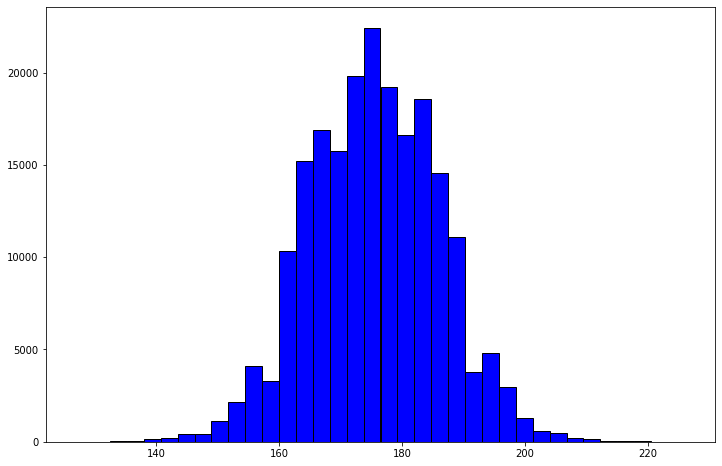

In [28]:
plt.figure(figsize = (12, 8))
plt.hist(df_atleta2['height'], color = 'blue', edgecolor = 'black', bins = int(180/5))

(array([8.0000e+00, 1.3000e+01, 2.0000e+01, 4.6000e+01, 1.2500e+02,
        2.1400e+02, 2.6200e+02, 5.6000e+02, 1.1020e+03, 2.1760e+03,
        2.4360e+03, 5.0140e+03, 1.0326e+04, 1.5214e+04, 8.9480e+03,
        2.3707e+04, 1.9790e+04, 2.2434e+04, 1.5291e+04, 2.0519e+04,
        1.8586e+04, 1.4579e+04, 6.7110e+03, 8.1180e+03, 4.7890e+03,
        2.9940e+03, 9.9100e+02, 9.1600e+02, 4.6200e+02, 2.2700e+02,
        1.3300e+02, 6.8000e+01, 4.2000e+01, 2.1000e+01, 8.0000e+00,
        3.0000e+00]),
 array([-4.63294205, -4.37196968, -4.11099731, -3.85002494, -3.58905257,
        -3.3280802 , -3.06710783, -2.80613546, -2.54516309, -2.28419072,
        -2.02321835, -1.76224598, -1.50127361, -1.24030124, -0.97932886,
        -0.71835649, -0.45738412, -0.19641175,  0.06456062,  0.32553299,
         0.58650536,  0.84747773,  1.1084501 ,  1.36942247,  1.63039484,
         1.89136721,  2.15233958,  2.41331195,  2.67428432,  2.93525669,
         3.19622906,  3.45720143,  3.7181738 ,  3.97914618,  4.2

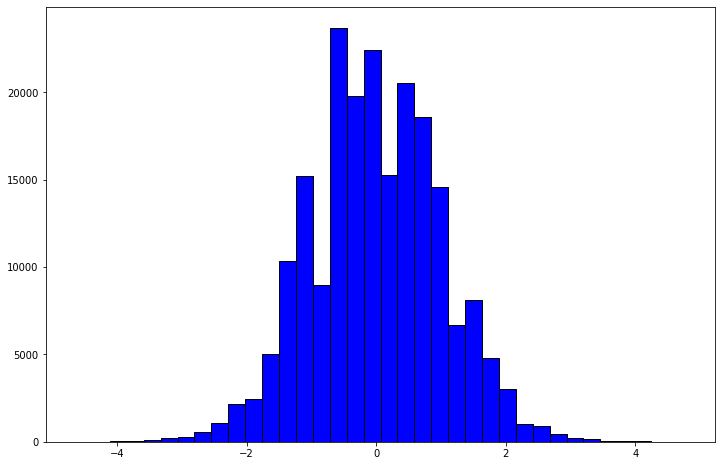

In [27]:
plt.figure(figsize = (12, 8))
plt.hist(df_atleta2_yeo_johnson['height'], color = 'blue', edgecolor = 'black', bins = int(180/5))

(array([6.2000e+01, 2.8000e+02, 1.0710e+03, 2.3100e+03, 9.2780e+03,
        1.7480e+04, 2.5604e+04, 2.9290e+04, 3.6061e+04, 2.6605e+04,
        2.1066e+04, 1.4207e+04, 1.1132e+04, 5.2300e+03, 2.8130e+03,
        1.4430e+03, 9.1300e+02, 5.2600e+02, 5.2100e+02, 3.4700e+02,
        3.1800e+02, 1.1600e+02, 5.8000e+01, 5.3000e+01, 1.9000e+01,
        2.1000e+01, 1.1000e+01, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00]),
 array([ 25.  ,  30.25,  35.5 ,  40.75,  46.  ,  51.25,  56.5 ,  61.75,
         67.  ,  72.25,  77.5 ,  82.75,  88.  ,  93.25,  98.5 , 103.75,
        109.  , 114.25, 119.5 , 124.75, 130.  , 135.25, 140.5 , 145.75,
        151.  , 156.25, 161.5 , 166.75, 172.  , 177.25, 182.5 , 187.75,
        193.  , 198.25, 203.5 , 208.75, 214.  ]),
 <a list of 36 Patch objects>)

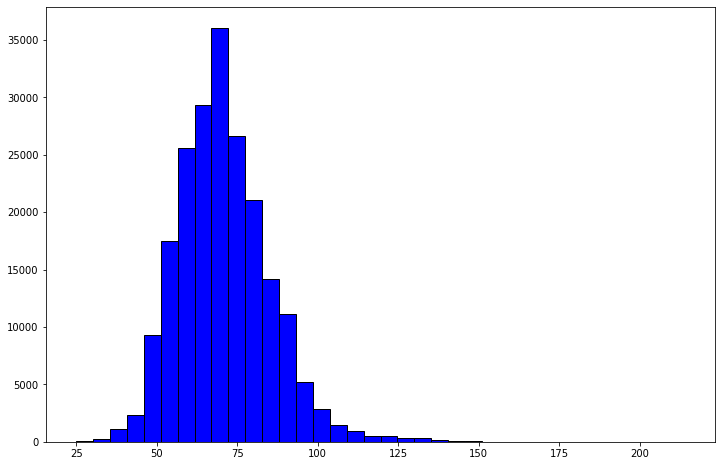

In [29]:
plt.figure(figsize = (12, 8))
plt.hist(df_atleta2['weight'], color = 'blue', edgecolor = 'black', bins = int(180/5))

(array([6.0000e+00, 1.4000e+01, 4.2000e+01, 2.3000e+01, 9.2000e+01,
        3.0200e+02, 3.6600e+02, 5.6800e+02, 1.1240e+03, 1.1860e+03,
        3.7660e+03, 5.5140e+03, 9.3630e+03, 1.7976e+04, 1.5743e+04,
        2.4533e+04, 2.1347e+04, 3.0177e+04, 2.0922e+04, 1.8953e+04,
        1.3443e+04, 8.9900e+03, 5.5850e+03, 3.3680e+03, 1.2660e+03,
        6.8100e+02, 7.7400e+02, 3.7600e+02, 1.8800e+02, 9.6000e+01,
        2.2000e+01, 3.1000e+01, 9.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00]),
 array([-5.03586846, -4.73756496, -4.43926147, -4.14095797, -3.84265448,
        -3.54435098, -3.24604749, -2.94774399, -2.6494405 , -2.351137  ,
        -2.05283351, -1.75453001, -1.45622651, -1.15792302, -0.85961952,
        -0.56131603, -0.26301253,  0.03529096,  0.33359446,  0.63189795,
         0.93020145,  1.22850494,  1.52680844,  1.82511193,  2.12341543,
         2.42171893,  2.72002242,  3.01832592,  3.31662941,  3.61493291,
         3.9132364 ,  4.2115399 ,  4.50984339,  4.80814689,  5.1

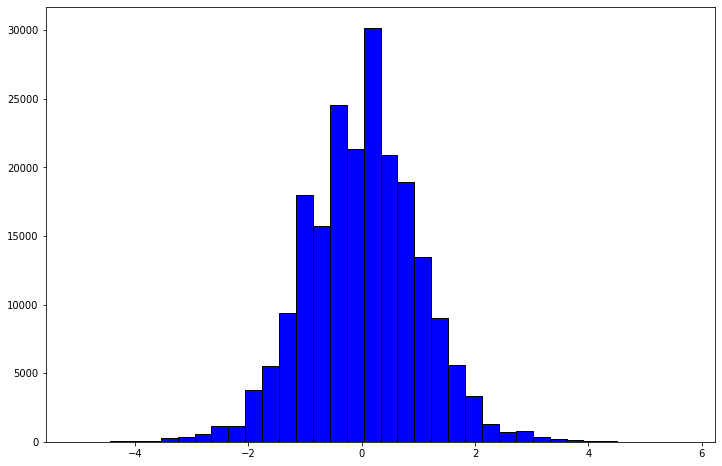

In [30]:
plt.figure(figsize = (12, 8))
plt.hist(df_atleta2_yeo_johnson['weight'], color = 'blue', edgecolor = 'black', bins = int(180/5))